torch.Size([1000000, 2])


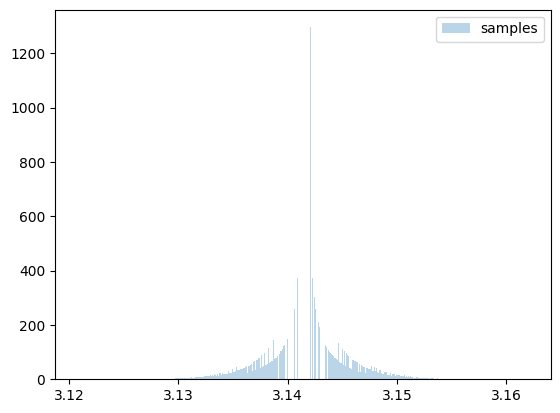

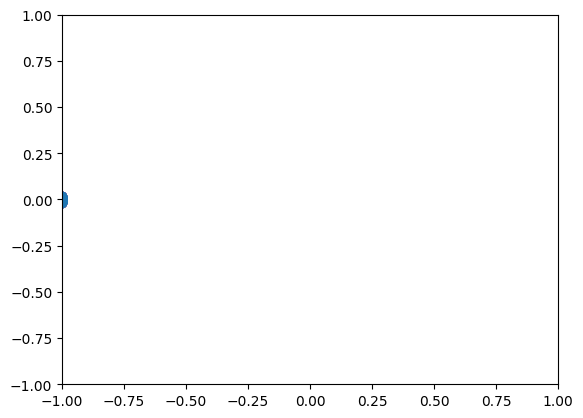

tensor([5.9316])

In [4]:
from power_spherical import HypersphericalUniform, PowerSpherical, MarginalTDistribution
import torch
import math
from matplotlib import pyplot as plt

loc = torch.tensor([-1.0, 0.0])
scale = torch.tensor([1e5])
dist = PowerSpherical(loc, scale)

x = dist.rsample((1000000,)).squeeze()
print(x.shape)
plt.hist(
    (lambda v: torch.where(v > 0, v, 2 * math.pi + v))(torch.atan2(x[:, 1], x[:, 0])),
    density=True,
    bins=1000,
    alpha=0.3,
    label="samples",
)

plt.legend()
plt.show()

plt.figure()
plt.scatter(x[:, 0], x[:, 1], alpha=0.01)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

ref = HypersphericalUniform(2)

torch.distributions.kl.kl_divergence(dist, ref)

torch.Size([10000])


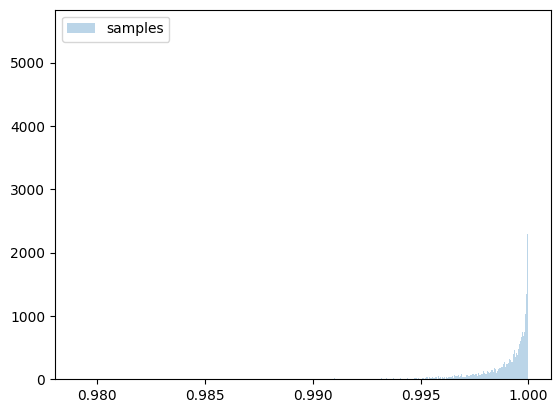

In [5]:
loc = torch.tensor([2])
scale = torch.tensor([1e3])
dist = MarginalTDistribution(loc, scale)

x = dist.sample((10000,)).squeeze()
print(x.shape)
plt.hist(
    x,
    density=True,
    bins=1000,
    alpha=0.3,
    label="samples",
)

plt.legend()
plt.show()

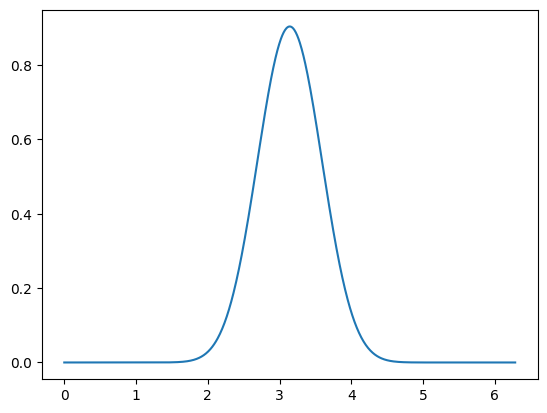

In [6]:
loc = torch.tensor([-1.0, 0.0])
scale = torch.tensor([1e1])
dist = PowerSpherical(loc, scale)

theta = torch.linspace(0, 2 * math.pi, 1000)
# theta = torch.linspace(math.pi - 0.01, math.pi + 0.01, 1000)
x = torch.stack([torch.cos(theta), torch.sin(theta)], dim=1)

# probs = dist.log_prob(x)
probs = torch.exp(dist.log_prob(x))
plt.plot(theta, probs.detach().numpy())

# # Create a figure
# plt.figure(figsize=(10, 6))

# # Plot the probability density around the circle
# plt.subplot(1, 2, 1)
# plt.plot(theta, probs.detach().numpy())
# plt.title('Probability Density around the Circle')
# plt.xlabel('Angle (radians)')
# plt.ylabel('Probability Density')

# # Plot the distribution in 2D
# plt.subplot(1, 2, 2)
# plt.scatter(x[:, 0].detach().numpy(), x[:, 1].detach().numpy(),
#            c=probs.detach().numpy(), cmap='viridis', s=10)
# plt.colorbar(label='Probability Density')
# plt.axis('equal')
# plt.title('PowerSpherical Distribution')
# # Plot the location parameter
# plt.arrow(0, 0, loc[0].item()*0.5, loc[1].item()*0.5,
#          head_width=0.1, head_length=0.1, fc='red', ec='red')
# plt.text(loc[0].item()*0.6, loc[1].item()*0.6, 'μ (loc)', color='red')

# plt.tight_layout()
# plt.show()